**Lorenzo's Notebook**

Importing useful packages and modules

In [46]:
from data_collector_client import AnomalyDetectionClient
from telethon.tl.types import MessageReactions
import asyncio
from decouple import config
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
import re
def reactions_splitting(message):
    pattern = r"emoticon=['\"](.*?)['\"].*?count=(\d+)"
    matches = re.findall(pattern, message)
    if matches:
        return matches
    else:
        return None

In [7]:

# Function to count the number of reactions in a message using the splitted reactions
def count_reactions(splitted_reaction):
    if(splitted_reaction == None):
        return 0
    else:
        tmp = []
        for i in range(len(splitted_reaction)):
            tmp.append(int(splitted_reaction[:][i][1]))
        return sum(tmp)

In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Function to preprocess a message removing stopwords of the specified language and special characters
def preprocess_message(message, language):
  # Removing special characters and \n
  message = re.sub(r"[^\w\s]", "", message)
  message = re.sub(r"\n", "", message)


  # Removing Stopwords
  stop_words = set(stopwords.words(language))
  message = " ".join([word for word in message.split() if word not in stop_words])

  # Convert to lowercase
  message = message.lower()

  # Removing empty words
  message = " ".join(message.split())

  return message

# example
messaggi = ["Ciao a tutti!", "Come va?", "Oggi è una bella giornata\n."]
preprocessed_messages = [preprocess_message(message,"italian") for message in messaggi]
print(preprocessed_messages)


['ciao', 'come va', 'oggi bella giornata']


[nltk_data] Downloading package stopwords to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df = pd.read_csv('trial.csv')

df['reactions'].fillna('', inplace=True)
df['reactions'] = df['reactions'].apply(lambda x: count_reactions(reactions_splitting(x)))

In [10]:
df.loc[df['reactions'] > 0]

,Unnamed: 0,group,sender,msg_id,reply,text,date,reactions
19,1,https://t.me/+synza2388S80NWM0,5328388801,289,NaN,If you found anything interesting send it here,2024-03-29 13:46:55+00:00,1
26,1,https://t.me/+synza2388S80NWM0,480675472,282,NaN,Anyway for What concern the meeting I have no ...,2024-03-29 13:18:17+00:00,1
30,1,https://t.me/+synza2388S80NWM0,5328388801,278,274.0,I can do it from 15h00 if you want to have a m...,2024-03-29 12:03:11+00:00,1
31,1,https://t.me/+synza2388S80NWM0,984447467,277,NaN,Also yesterday I made a small script to automa...,2024-03-29 12:01:18+00:00,1
37,1,https://t.me/+synza2388S80NWM0,480675472,271,NaN,Yesterday I added also the message_id and repl...,2024-03-29 11:44:40+00:00,1
40,1,https://t.me/+synza2388S80NWM0,480675472,268,NaN,You could normalize it and use it as feature f...,2024-03-29 11:41:16+00:00,1
43,1,https://t.me/+synza2388S80NWM0,5328388801,265,NaN,Sorry i got caught up in the middle of somethi...,2024-03-28 18:46:07+00:00,2
45,1,https://t.me/+synza2388S80NWM0,5328388801,263,NaN,This is what i thought \n\nI didn't wanted to ...,2024-03-28 16:30:26+00:00,3
46,1,https://t.me/+synza2388S80NWM0,382281069,262,261.0,Excellent\nDon't forget to put us in cc,2024-03-28 16:28:19+00:00,1
47,1,https://t.me/+synza2388S80NWM0,5328388801,261,NaN,"Hello Prof. Pernici,\n\nWe wanted to update yo...",2024-03-28 16:27:10+00:00,2


**Laser Embedding**

In [11]:
texts = df['text']
preprocessed_texts = [preprocess_message(text, "english") for text in texts]
print("-----NORMAL TEXTS-----")
print(texts[0:5])
print("\n-----PREPROCESSED TEXTS-----")
print(preprocessed_texts[0:5])

print(len(preprocessed_texts))
print(len(texts))


-----NORMAL TEXTS-----
0    I think that we’ll use chatgpt in the future, ...
1    not sure either. Maybe trying to read some pap...
2    Yes it's probably better this way. It might be...
3    Also I'm not sure about what I should be worki...
4    yeah, probably\nbut maybe transformers are com...
Name: text, dtype: object

-----PREPROCESSED TEXTS-----
['i think well use chatgpt future maybe create python script useful functions use easily future works', 'sure either maybe trying read paper compare others work i donno', 'yes probably better way it might useful since messages short even stopwords importat', 'also im sure i working specif task mind let know ill', 'yeah probablybut maybe transformers complex enough ignore words i mean trained huge amount data we postpone later implement model performance high enough']
55
55


In [12]:
langs = ["en" for i in range(len(texts))]

from laserembeddings import Laser

laser = Laser()

# if all sentences are in the same language:

embeddings = laser.embed_sentences(
    texts,
    lang=langs)

embeddings.shape

(55, 1024)

In [17]:
def plot_reduced_embeddings_2D(texts, lang):
    langs = [lang for i in range(len(texts))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings = laser.embed_sentences(
    texts,
    lang=langs)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    # Plottare i punti
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

    for i, point in enumerate(reduced_embeddings):
        # Annotate each point with the message number
        plt.annotate(str(i + 1), point, ha='center', va='center')

    plt.show()

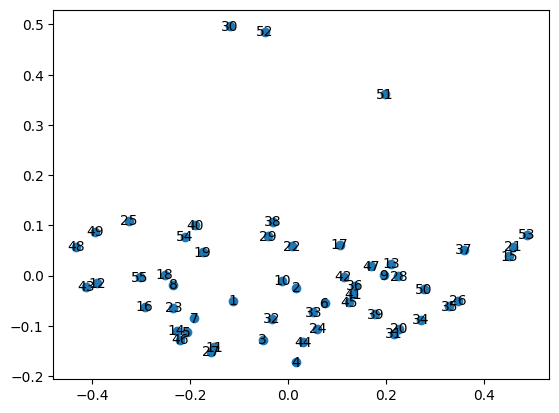

In [18]:
plot_reduced_embeddings_2D(texts, "en")

In [19]:
print("30 : " + texts[30])
print("52 : " + texts[52])
print("51 : " + texts[51])

30 : I can do it from 15h00 if you want to have a meeting
52 : Ok
51 : https://meet.google.com/akm-dase-qca


Now we use the dataset 'poli_msgs.csv' where there are information about the messages of the polinetwork group 

We'll plot the data as we have done before to see if there is any change in the distribution of the messages of two different groups

In [20]:
polidf = pd.read_csv('poli_msgs.csv')

polidf['reactions'].fillna('', inplace=True)
polidf['reactions'] = polidf['reactions'].apply(lambda x: count_reactions(reactions_splitting(x)))

polidf.head()

,Unnamed: 0,group,sender,msg_id,reply,text,date,reactions
0,1,https://t.me/PoliGruppo,768169879,205531,205529.0,**Here are the groups **:,2024-03-29 13:18:37+00:00,0
1,1,https://t.me/PoliGruppo,825112400,205529,NaN,"Ciao a tutti, dovrei fare l'esame di stato a g...",2024-03-29 13:00:05+00:00,0
2,1,https://t.me/PoliGruppo,768169879,205525,205522.0,**Ecco i gruppi**:,2024-03-29 10:20:47+00:00,0
3,1,https://t.me/PoliGruppo,821857100,205523,205522.0,Non è un gruppo per fare recruiting,2024-03-29 10:19:15+00:00,0
4,1,https://t.me/PoliGruppo,450217695,205522,NaN,Ragazzi Ciao!\nCi sono ingegneri strutturisti ...,2024-03-29 10:15:54+00:00,0


In [28]:
def plot_and_compare_reduced_embeddings_2D(texts1, texts2, lang1, lang2):
    langs1 = [lang1 for i in range(len(texts1))]
    langs2 = [lang2 for i in range(len(texts2))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1,
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2,
    lang=langs2)

    pca = PCA(n_components=2)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=2)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    # Plottare i punti
    plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], c='b')
    plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], c='r')

    plt.show()

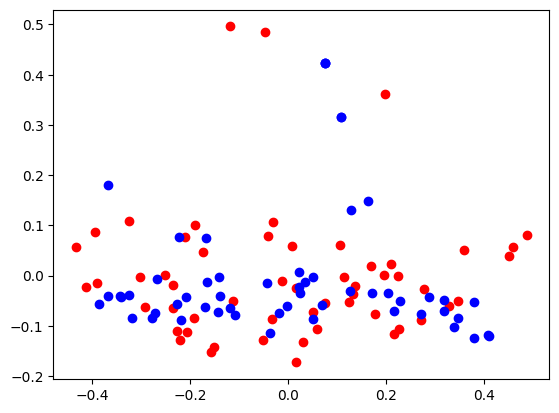

In [27]:
plot_and_compare_reduced_embeddings_2D(texts, polidf['text'], "en", "it")

In [38]:
poli_texts = polidf['text']
poli_texts_strings = [str(text) for text in poli_texts if isinstance(text, str)] 
print(poli_texts[0:5])
print(poli_texts_strings[0:5])



0                            **Here are the groups **:
1    Ciao a tutti, dovrei fare l'esame di stato a g...
2                                   **Ecco i gruppi**:
3                  Non è un gruppo per fare recruiting
4    Ragazzi Ciao!\nCi sono ingegneri strutturisti ...
Name: text, dtype: object
['**Here are the groups **:', "Ciao a tutti, dovrei fare l'esame di stato a giugno di ingegneria industriale, online non ho trovato corsi o consigli su come prepararsi. Qualcuno ha già svolto l'esame? o conosce qualcuno che l'ha fatto?", '**Ecco i gruppi**:', 'Non è un gruppo per fare recruiting', "Ragazzi Ciao!\nCi sono ingegneri strutturisti iscritto all'albo qui nel gruppo? \nSe sì, o se ne conoscete uno, scrivetemi in privato che ho bisogno per un lavoro."]


Try by plotting in the space

In [43]:
def plot_and_compare_reduced_embeddings_3D(texts1, texts2, lang1, lang2, name1, name2):
    langs1 = [lang1 for i in range(len(texts1))]
    langs2 = [lang2 for i in range(len(texts2))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1,
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2,
    lang=langs2)

    pca = PCA(n_components=3)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=3)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    import plotly.graph_objects as go

    # Importare i dati
    import numpy as np

    # Creare la figura
    fig = go.Figure()

    # Plot each set of points with a unique colormap
    fig.add_scatter3d(
        x=reduced_embeddings1[:, 0],
        y=reduced_embeddings1[:, 1],
        z=reduced_embeddings1[:, 2],
        mode='markers',
        marker=dict(color='blue', size=8),  # Use a color name or hex code for direct coloring
        name=name1
    )

    fig.add_scatter3d(
        x=reduced_embeddings2[:, 0],
        y=reduced_embeddings2[:, 1],
        z=reduced_embeddings2[:, 2],
        mode='markers',
        marker=dict(color='red', size=8),  # Use a different color for this set
        name=name2
    )

    # Aggiungere le legende
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Mostrare il plot
    fig.show()

In [44]:
plot_and_compare_reduced_embeddings_3D(texts, poli_texts_strings, "en", "it", "Our Group", "PoliNetwork Group")

Doing the same as before using the preprocessed texts

In [4]:
preprocessed_texts = [preprocess_message(text, "english") for text in texts]
poli_preprocessed_texts = [preprocess_message(text, "italian") for text in poli_texts_strings]


NameError: name 'texts' is not defined

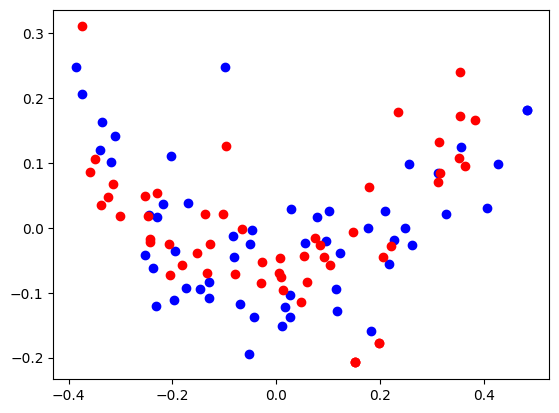

In [41]:
plot_and_compare_reduced_embeddings_2D(preprocessed_texts, poli_preprocessed_texts, "en", "it")

In [45]:
plot_and_compare_reduced_embeddings_3D(preprocessed_texts, poli_preprocessed_texts, "en", "it", "Our Group", "PoliNetwork Group")